In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A_df = pd.read_csv('./csv/600016SH.csv')

In [3]:
A_df.head()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元)
0,600016.SH,民生银行,2000-12-19,--,20.00,21.00,18.50,18.56,156352456,3058872084,--,--,19.5640
1,600016.SH,民生银行,2000-12-20,18.56,18.47,18.47,17.91,18.10,29046713,526016570,-0.46,-2.4784,18.1093
2,600016.SH,民生银行,2000-12-21,18.10,18.18,18.48,18.00,18.09,11362956,206705741,-0.01,-0.0552,18.1912
3,600016.SH,民生银行,2000-12-22,18.09,18.10,18.17,17.60,17.66,13026488,231272602,-0.43,-2.3770,17.7540
4,600016.SH,民生银行,2000-12-25,17.66,17.60,17.62,17.01,17.20,10113120,174453021,-0.46,-2.6048,17.2502


In [4]:
H_df = pd.read_csv('./csv/1988HK.csv')

In [5]:
H_df.head()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元)
0,1988.HK,民生银行,2009-11-26,--,9.05,9.07,8.78,8.80,776221500,6960884789,--,--,8.9677
1,1988.HK,民生银行,2009-11-27,8.80,8.49,8.79,8.47,8.64,218904000,1888041550,-0.16,-1.8182,8.6250
2,1988.HK,民生银行,2009-11-30,8.64,8.85,8.90,8.71,8.77,91107500,804294596,0.13,1.5046,8.8280
3,1988.HK,民生银行,2009-12-01,8.77,8.80,8.82,8.70,8.73,39991246,349579888,-0.04,-0.4561,8.7414
4,1988.HK,民生银行,2009-12-02,8.73,8.80,8.85,8.77,8.77,47713500,419943495,-0.04,0.4582,8.8014


In [6]:
EX_df = pd.read_csv('./csv/人民币汇率(日).csv')
EX_df = EX_df.iloc[1:]

In [7]:
EX_df.head()

,指标名称,中间价:港元兑人民币
1,1994-09-01,1.11
2,1994-09-02,1.11
3,1994-09-05,1.11
4,1994-09-06,1.11
5,1994-09-07,1.11


In [8]:
def filtDate(stock_df):
    return stock_df[(stock_df['日期']>='2010') & (stock_df['日期']<='2019')]

In [9]:
A_df = filtDate(A_df)
H_df = filtDate(H_df)

In [10]:
compare_df = pd.DataFrame({
    'Name':[],
    'Date':[],
    'ClosePriceA':[],
    'ClosePriceH':[],
    'ExchangeRate':[],
    'AdjustedPrice(H)':[],
    'A Growth':[],
    'H Growth':[],
    'PriceDiff':[],
    'PriceDiffRate':[],
})

In [11]:
def date_inH(row):
    global compare_df
    date = row['日期']
    name = row['简称']
    if date in H_df['日期'].values:
        close_A = row['收盘价(元)']
        growth_A = row['涨跌幅(%)']
        close_H_row = H_df[H_df['日期'].isin([date])]
        close_H = close_H_row['收盘价(元)'].values[0]
        growth_H = close_H_row['涨跌幅(%)'].values[0]
        EX_rate_row = EX_df[EX_df['指标名称']==date]
        ExpectedA = None
        try:
            EX_rate = EX_rate_row['中间价:港元兑人民币'].values[0]
            ExpectedA = close_H*float(EX_rate)
            price_diff = close_A-ExpectedA
            price_dfffrate = price_diff/close_A
        except:
            print(date, ' no exchange rate')
            EX_rate = None
            price_diff = None
            price_dfffrate = None
        compare_df.loc[compare_df.shape[0]+1] = {
            'Name':name, 
            'Date':date, 
            'ClosePriceA':close_A, 
            'ClosePriceH':close_H, 
            'ExchangeRate': EX_rate, 
            'AdjustedPrice(H)': ExpectedA,
            'A Growth': growth_A, 
            'H Growth': growth_H,
            'PriceDiff':price_diff,
            'PriceDiffRate':price_dfffrate
        }
    else:
        return

In [12]:
def skip_opt():
    A_df.apply(date_inH, axis=1)
skip_opt()

2011-12-31  no exchange rate
2016-12-31  no exchange rate


In [13]:
compare_df['AdjustedPrice(H)'] = compare_df['AdjustedPrice(H)'].astype(float)
compare_df['A Growth'] = compare_df['A Growth'].astype(float)
compare_df['H Growth'] = compare_df['H Growth'].astype(float)

In [14]:
compare_df.head()

,Name,Date,ClosePriceA,ClosePriceH,ExchangeRate,AdjustedPrice(H),A Growth,H Growth,PriceDiff,PriceDiffRate
1,民生银行,2010-01-04,7.93,8.87,0.88,7.8056,0.2528,1.7202,0.1244,0.0156873
2,民生银行,2010-01-05,8.07,8.85,0.88,7.7880,1.7654,-0.2255,0.282,0.0349442
3,民生银行,2010-01-06,7.91,8.75,0.88,7.7000,-1.9827,-1.1299,0.21,0.0265487
4,民生银行,2010-01-07,7.70,8.68,0.88,7.6384,-2.6549,-0.8000,0.0616,0.008
5,民生银行,2010-01-08,7.78,8.69,0.88,7.6472,1.0390,0.1152,0.1328,0.0170694


In [15]:
compare_df.to_csv('./ClosePrices.csv')

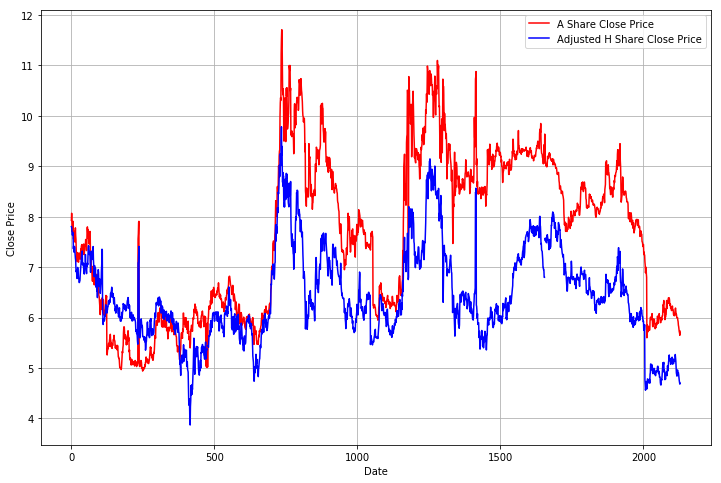

In [16]:
fig = plt.figure(figsize=(12,8))
plt.plot(compare_df['ClosePriceA'], 'r', label='A Share Close Price')
plt.plot(compare_df['AdjustedPrice(H)'], 'b', label='Adjusted H Share Close Price')
plt.legend(loc=1)
plt.grid(True)

plt.xlabel("Date")
plt.ylabel('Close Price')
plt.savefig('./Close Price A share.png')

Text(0,0.5,'Growth')

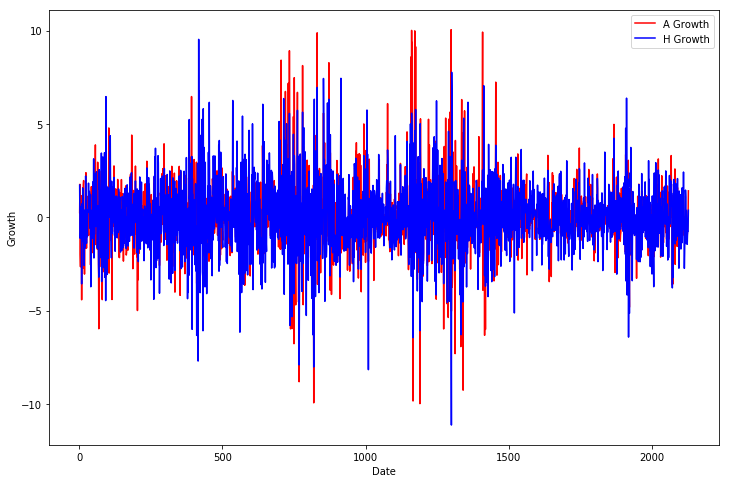

In [17]:
fig = plt.figure(figsize=(12,8))
plt.plot(compare_df['A Growth'], 'r', label='A Growth')
plt.plot(compare_df['H Growth'], 'b', label='H Growth')
plt.legend(loc=1)

plt.xlabel("Date")
plt.ylabel('Growth')

In [18]:
limit_df = compare_df[(compare_df['A Growth']>=10) | (compare_df['A Growth']<=-10)]
limit_df.head()

,Name,Date,ClosePriceA,ClosePriceH,ExchangeRate,AdjustedPrice(H),A Growth,H Growth,PriceDiff,PriceDiffRate
1161,民生银行,2014-12-02,7.91,8.71,0.79,6.8809,10.0139,5.5758,1.0291,0.130101
1299,民生银行,2015-07-07,10.73,8.98,0.79,7.0942,10.0513,-5.0740,3.6358,0.338844


In [19]:
limit_df.to_csv('./MSYH_limit.csv')

Text(0,0.5,'Growth')

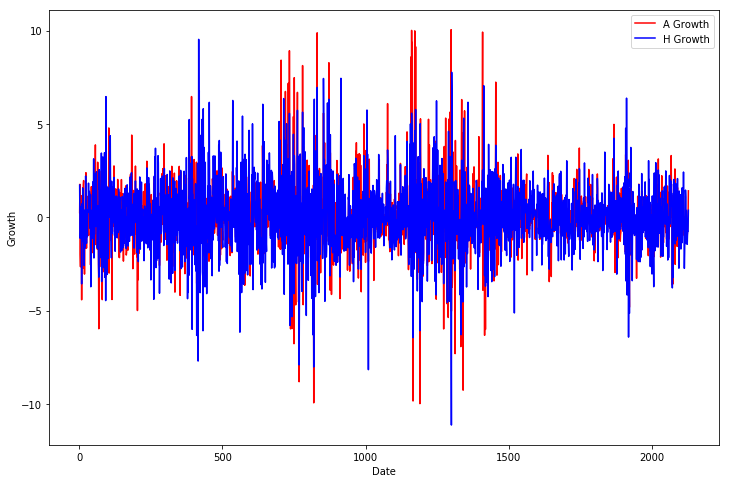

In [20]:
fig = plt.figure(figsize=(12,8))
plt.plot(compare_df['A Growth'], 'r', label='A Growth')
plt.plot(compare_df['H Growth'], 'b', label='H Growth')
plt.legend(loc=1)

plt.xlabel("Date")
plt.ylabel('Growth')

Text(0,0.5,'Growth (Limit)')

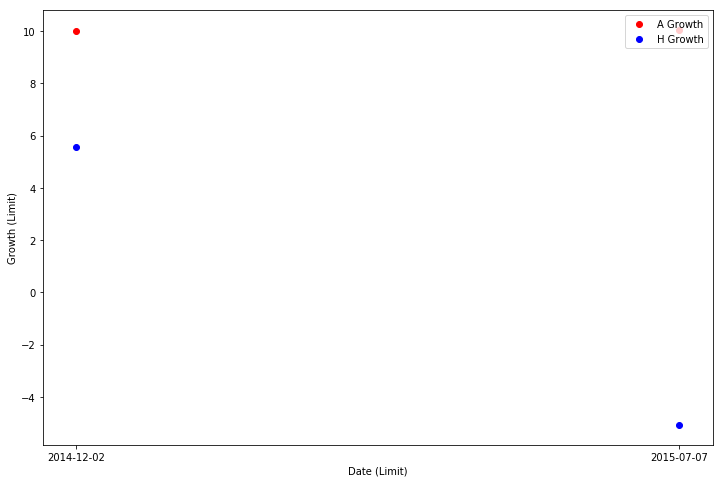

In [21]:
fig = plt.figure(figsize=(12,8))
plt.scatter(limit_df['Date'], limit_df['A Growth'], c='r', label='A Growth')
plt.scatter(limit_df['Date'], limit_df['H Growth'], c='b', label='H Growth')
plt.legend(loc=1)

plt.xlabel("Date (Limit)")
plt.ylabel('Growth (Limit)')

In [22]:
notlimit_df = compare_df[(compare_df['A Growth']<=10) | (compare_df['A Growth']>=-10)]

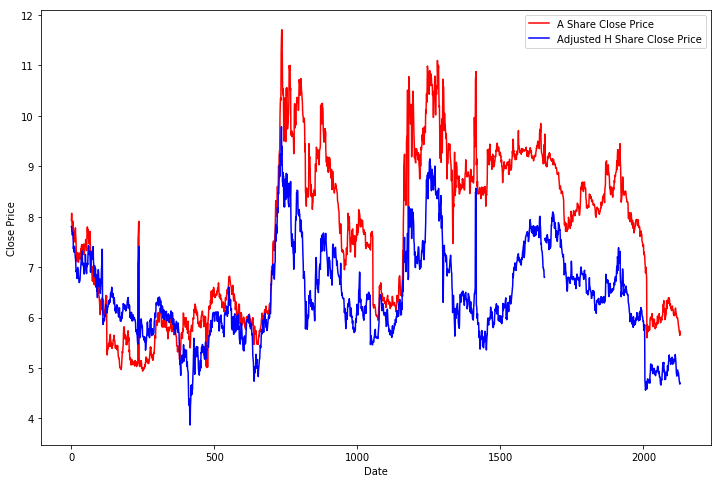

In [23]:
fig = plt.figure(figsize=(12,8))
plt.plot(notlimit_df['ClosePriceA'], 'r', label='A Share Close Price')
plt.plot(notlimit_df['AdjustedPrice(H)'], 'b', label='Adjusted H Share Close Price')
plt.legend(loc=1)

plt.xlabel("Date")
plt.ylabel('Close Price')
plt.savefig('./Close Price A share.png')

Text(0,0.5,'Growth')

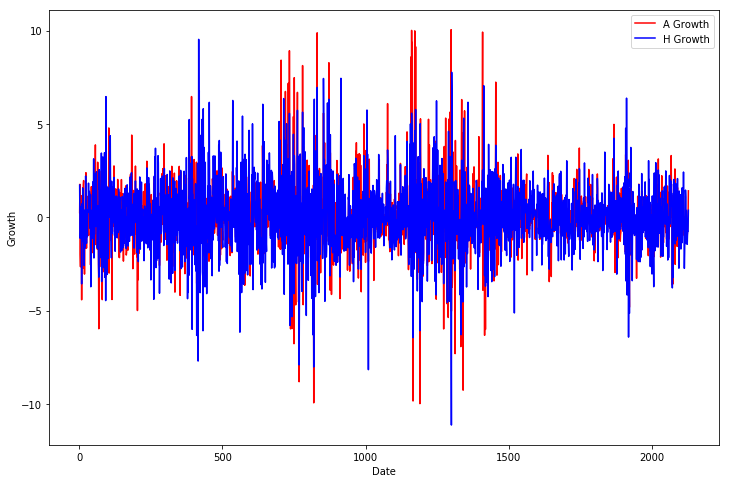

In [24]:
fig = plt.figure(figsize=(12,8))
plt.plot(notlimit_df['A Growth'], 'r', label='A Growth')
plt.plot(notlimit_df['H Growth'], 'b', label='H Growth')
plt.legend(loc=1)

plt.xlabel("Date")
plt.ylabel('Growth')

Text(0,0.5,'Growth (H)')

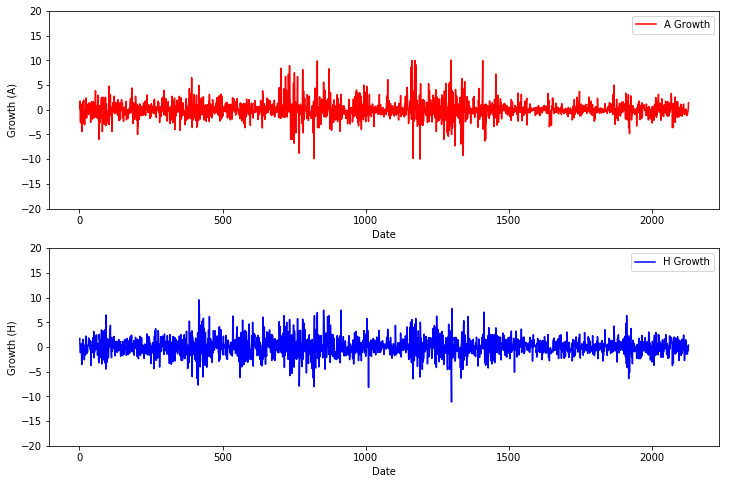

In [25]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(notlimit_df['A Growth'], 'r', label='A Growth')
plt.ylim(-20, 20)
plt.legend(loc=1)
plt.xlabel("Date")
plt.ylabel('Growth (A)')

plt.subplot(2,1,2)
plt.plot(notlimit_df['H Growth'], 'b', label='H Growth')
plt.ylim(-20, 20)
plt.legend(loc=1)

plt.xlabel("Date")
plt.ylabel('Growth (H)')

Text(0,0.5,'Price Difference')

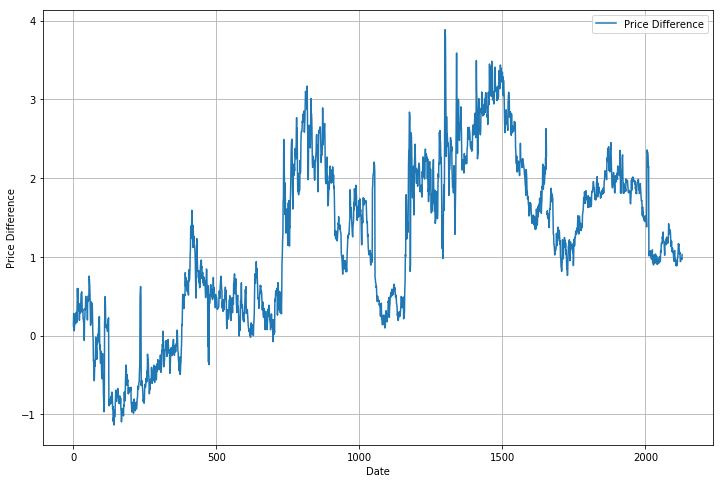

In [26]:
diff = compare_df['ClosePriceA'] - compare_df['AdjustedPrice(H)']
fig = plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(diff, label='Price Difference')
plt.legend(loc=1)
plt.xlabel("Date")
plt.ylabel('Price Difference')

Text(0,0.5,'Price Difference')

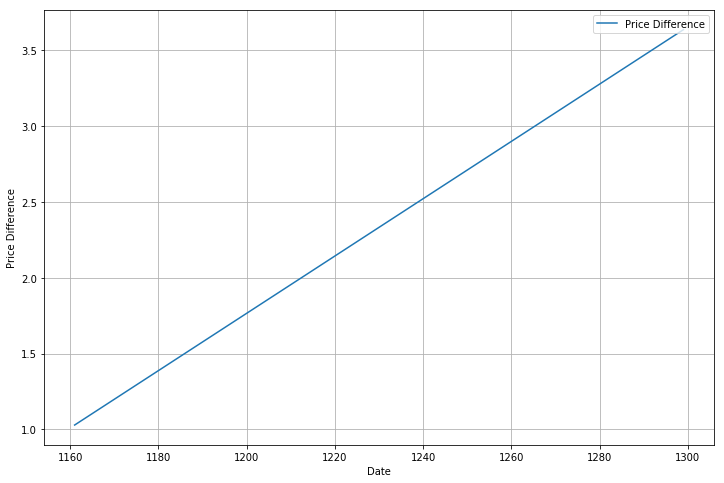

In [27]:
### draw price diff of days when A share reaches the limit
diff = limit_df['ClosePriceA'] - limit_df['AdjustedPrice(H)']
fig = plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(diff, label='Price Difference')
plt.legend(loc=1)
plt.xlabel("Date")
plt.ylabel('Price Difference')

Text(0,0.5,'Price Difference')

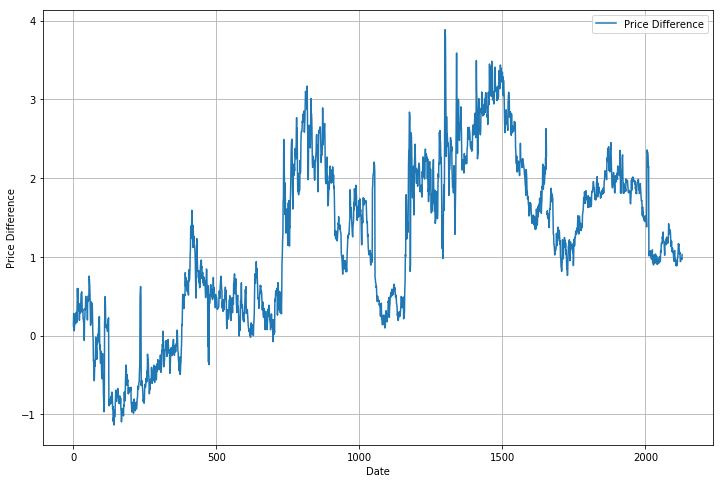

In [28]:
### draw price diff of days when A share reaches the limit
diff = notlimit_df['ClosePriceA'] - notlimit_df['AdjustedPrice(H)']
fig = plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(diff, label='Price Difference')
plt.legend(loc=1)
plt.xlabel("Date")
plt.ylabel('Price Difference')

In [29]:
notlimit_df.to_csv('./not_limit.csv')